Starting with loading libraries and data

In [218]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import re

In [87]:
!python -m spacy download pl_core_news_md #downloading the PL language model for later use
nlp = spacy.load("pl_core_news_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 MB 15.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [128]:
df = pd.read_csv("/content/dane5.csv")
df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Tue May 18 16:52:03 +0000 2021,NaN,NaN,NaN,0,1394697302728749068,NaN,NaN,NaN,...,2670,2474,16,NaN,Bartek Grzebalski 🇵🇱♥💪✝️,Bartek93794875,889206,NaN,NaN,False
1,NaN,Wed May 19 11:31:01 +0000 2021,NaN,NaN,https://tvn24.pl/biznes/z-kraju/praca-zdalna-w...,2,1394978896660078595,NaN,NaN,NaN,...,172417,93,500,Polska,TVN24 BiS,TVN24BiS,76779,NaN,http://tvn24bis.pl/,True
2,NaN,Tue May 18 17:46:25 +0000 2021,NaN,NaN,NaN,0,1394710981184475136,NaN,NaN,NaN,...,699,591,4,"Toruń, Polska",magda,Magdaiks,229241,NaN,NaN,False
3,NaN,Tue May 18 19:49:34 +0000 2021,NaN,NaN,NaN,0,1394741976038350849,NaN,NaN,NaN,...,1824,1771,15,NaN,Krzysztof 🇵🇱.,KrzysztofKando1,104046,NaN,NaN,False
4,NaN,Wed May 19 05:13:22 +0000 2021,NaN,NaN,NaN,0,1394883858701639684,NaN,NaN,NaN,...,262,353,9,NaN,Krzysztof Strojek,KKStrojek,47074,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,NaN,Thu May 13 11:03:58 +0000 2021,NaN,NaN,NaN,2,1392797762501156869,NaN,NaN,NaN,...,72,177,1,"him, aquarius",dominic,loveyoulikegod,3659,NaN,NaN,False
477,NaN,Thu May 13 09:50:02 +0000 2021,NaN,NaN,NaN,0,1392779156941856772,NaN,NaN,NaN,...,679,98,4,NaN,Marcin Pioskur,soipruk,18248,NaN,NaN,False
478,NaN,Thu May 13 08:16:57 +0000 2021,NaN,NaN,https://alleopole.pl/ogloszenie/33861/rekruter...,0,1392755734404812800,NaN,NaN,NaN,...,173,952,2,NaN,Wojciech Kac,wojciech_kac,41215,NaN,NaN,False
479,NaN,Thu May 13 11:34:56 +0000 2021,NaN,NaN,NaN,0,1392805558479171586,NaN,NaN,NaN,...,527,566,14,NaN,Obserwatorr,ObiektywnyObse2,207633,NaN,NaN,False


# Part 1 - Processing and cleaning the data


In [130]:
# Replace abbreviated weekday names with english equivalents (full weekday names) - created_at column
replacements_days = {"Mon":"Monday","Tue":"Tuesday","Wed":"Wednesday","Thu": "Thursday","Fri":"Friday","Sat":"Saturday","Sun":"Sunday"}
df['created_at'] = df['created_at'].replace(replacements_days, regex=True)
df['created_at']

,created_at
0,Tuesday May 18 16:52:03 +0000 2021
1,Wednesday May 19 11:31:01 +0000 2021
2,Tuesday May 18 17:46:25 +0000 2021
3,Tuesday May 18 19:49:34 +0000 2021
4,Wednesday May 19 05:13:22 +0000 2021
...,...
476,Thursday May 13 11:03:58 +0000 2021
477,Thursday May 13 09:50:02 +0000 2021
478,Thursday May 13 08:16:57 +0000 2021
479,Thursday May 13 11:34:56 +0000 2021


In [129]:
# Replace abbreviated month names with numerical equivalents (e.g. Jun to 06) - user_created_at column
replacements_months = {"Jan":"01","Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}
df['user_created_at'] = df['user_created_at'].replace(replacements_months,regex=True)
df['user_created_at']

,user_created_at
0,Sun 04 19 12:51:49 +0000 2020
1,Thu 10 03 13:03:25 +0000 2013
2,Wed 08 26 11:01:03 +0000 2009
3,Sun 04 07 08:03:46 +0000 2019
4,Sun 10 20 20:04:51 +0000 2013
...,...
476,Sat 01 26 19:30:44 +0000 2019
477,Thu 01 07 12:04:50 +0000 2021
478,Wed 02 11 12:01:10 +0000 2015
479,Wed 01 15 09:18:42 +0000 2020


In [91]:
# Get all links to tweets and pass them to the list
links_to_tweets = df['tweet_url'].tolist()
links_to_tweets

['https://twitter.com/Bartek93794875/status/1394697302728749068',
 'https://twitter.com/TVN24BiS/status/1394978896660078595',
 'https://twitter.com/Magdaiks/status/1394710981184475136',
 'https://twitter.com/KrzysztofKando1/status/1394741976038350849',
 'https://twitter.com/KKStrojek/status/1394883858701639684',
 'https://twitter.com/niewidzialni_eu/status/1394905467760091137',
 'https://twitter.com/ZStolicy/status/1394975959833534464',
 'https://twitter.com/iwantaxiong/status/1394992908474978310',
 'https://twitter.com/RMF24pl/status/1394965467001937923',
 'https://twitter.com/PrawoPLserwis/status/1394888074686078978',
 'https://twitter.com/jobpoland/status/1394782429290934273',
 'https://twitter.com/BizblogPl/status/1394981108069109766',
 'https://twitter.com/marychlak/status/1395008369203765253',
 'https://twitter.com/Dariusz_Jaqub/status/1394738302213890049',
 'https://twitter.com/StarostwoZywiec/status/1394931180378677248',
 'https://twitter.com/DziennikPL/status/13949660771054837

In [92]:
# Get all links found in tweets and pass them to the list (urls column)
links_from_tweets = df['urls'].dropna().tolist() # I also got rid of missing values
links_from_tweets

['https://tvn24.pl/biznes/z-kraju/praca-zdalna-w-kodeksie-pracy-ruszaja-konsultacje-5098320',
 'http://m.in http://niewidzialni.eu/Profilaktyka_po_pandemii,17989.html',
 'https://zyciestolicy.com.pl/projekt-ustawy-regulujacy-prace-zdalna-doplata-za-prad-i-internet-to-czesc-z-propozycji/',
 'http://www.rmf24.pl/ekonomia/news-praca-zdalna-po-epidemii-szef-bedzie-musial-zaplacic-za-prad,nId,5241995',
 'https://www.prawo.pl/kadry/praca-zdalna-w-epidemii-w-ue,508333.html',
 'https://poland.jobrat.net/2021/05/19/asystentka-praca-zdalna-warszawa/',
 'https://spidersweb.pl/bizblog/praca-zdalna-rachunki-prad-internet/',
 'http://zywiec.powiat.pl/post/xxv-zdalna-sesja-rady-powiatu-w-zywcu,4453.html',
 'https://gospodarka.dziennik.pl/praca/artykuly/8167209,praca-zdalna-iwona-michalek-ministerstwo-pracy.html?utm_source=dlvr.it&utm_medium=twitter',
 'https://zyciestolicy.com.pl/projekt-ustawy-regulujacy-prace-zdalna-doplata-za-prad-i-internet-to-czesc-z-propozycji/',
 'https://www.fakt.pl/pieniadze

In [93]:
# Get all image links and pass them to the list (media column)
image_links = df['media'].dropna().tolist()
image_links

['https://twitter.com/StarostwoZywiec/status/1394931180378677248/photo/1',
 'https://twitter.com/pemmax/status/1394932542814425091/photo/1',
 'https://twitter.com/BIPolska/status/1394965947736281088/photo/1',
 'https://twitter.com/marychlak/status/1394999955316695047/photo/1',
 'https://twitter.com/emitenci/status/1394935010826858496/photo/1',
 'https://twitter.com/home_pl/status/1394690718455709703/photo/1',
 'https://twitter.com/MagdaMarrkefka/status/1394693431495118849/photo/1',
 'https://twitter.com/charm_breeze/status/1394582372713107456/photo/1',
 'https://twitter.com/SiecObywatelska/status/1394555404600885248/photo/1',
 'https://twitter.com/BettyElaWhite/status/1394614919782359040/photo/1',
 'https://twitter.com/ngopl/status/1394608705413558275/photo/1',
 'https://twitter.com/babkazpiasku/status/1394173534973345793/photo/1',
 'https://twitter.com/BonkolTV/status/1394239381645447170/photo/1',
 'https://twitter.com/tvp3szczecin/status/1394191676189646848/photo/1',
 'https://twitte

In [94]:
# Remove all words marked as stopwords and pass the cleaned text to a new column called text_without_stopwords.
stop_words = nlp.Defaults.stop_words #accessing the set of stop words first

In [131]:
def removing_stopwords(text):
    doc = nlp(text)
    return " ".join(token.text for token in doc if token.text.lower() not in stop_words)

df['text_without_stopwords'] = df['text'].apply(removing_stopwords)
df['text_without_stopwords']

,text_without_stopwords
0,"[ WIDEO ] \n @CzarnekP : młodzież wiedzieć , P..."
1,Rozpoczynamy ustawowe konsultacje przepisów re...
2,"[ WIDEO ] \n @CzarnekP : młodzież wiedzieć , P..."
3,"[ WIDEO ] \n @CzarnekP : młodzież wiedzieć , P..."
4,Oczywiście związku nauka zdalną . https://t.co...
...,...
476,szkoła odpierdala przechodzi . napisałbym ryj ...
477,Zdalna szkoła zastąpi interakcji nauczycielem ...
478,Rekruter osoba orzeczeniem - praca zdalna - Da...
479,Zdalna szkoła zastąpi interakcji nauczycielem ...


# Part 2 - Exploratory data analysis



In [118]:
# List the top 5 tweets with the highest number of likes.
df_by_likes = df.sort_values(by='favorite_count', ascending=False)
df_by_likes['text'].head(5)  #only the content - for a clearer view

,text
450,"Kochani, mamy to! Udało mi się załatwić sesję ..."
475,Zdalna szkoła nie zastąpi interakcji z nauczyc...
398,"InPost zaliczył u mnie mocnego plusika, bo ofe..."
214,"Kocham pracę zdalną, bo mogę siedzieć w krótki..."
163,"Gdy dziecko ma zdalną plastykę, a zapomnieliśc..."


In [119]:
# List the top 5 tweets with the highest number of retweets.
df_by_retweets = df.sort_values(by='retweet_count', ascending=False)
df_by_retweets['text'].head(5) #only the content - for a clearer view

,text
480,Zdalna szkoła nie zastąpi interakcji z nauczyc...
413,Zdalna szkoła nie zastąpi interakcji z nauczyc...
411,Zdalna szkoła nie zastąpi interakcji z nauczyc...
409,Zdalna szkoła nie zastąpi interakcji z nauczyc...
407,Zdalna szkoła nie zastąpi interakcji z nauczyc...


In [120]:
# Show only tweets that are not considered 'sensitive' (possibly_sensitive column).
nonsensitive_df = df[df['possibly_sensitive'] == False]
nonsensitive_df['text'] #only the content - for a clearer view

,text
1,Rozpoczynamy ustawowe konsultacje przepisów re...
5,"Pandemia, praca zdalna i lockdowny spowodowały..."
8,Praca zdalna po epidemii? Szef będzie musiał z...
9,"Pandemia sprawiła, że biura opustoszały, a mie..."
10,"Asystentka (praca zdalna), Warszawa - https://..."
...,...
463,Asystent w Dziale Spedycji Morskiej - osoba z ...
469,Analityk ze znajomością języka angielskiego – ...
471,Asystent w Dziale Finansowym – praca zdalna - ...
475,Zdalna szkoła nie zastąpi interakcji z nauczyc...


In [ ]:
# List the top 5 tweets with the highest number of retweets.
df_by_retweets = df.sort_values(by='retweet_count', ascending=False)
df_by_retweets['text'].head(5) #only the content - for a clearer view

,text
480,Zdalna szkoła nie zastąpi interakcji z nauczyc...
413,Zdalna szkoła nie zastąpi interakcji z nauczyc...
411,Zdalna szkoła nie zastąpi interakcji z nauczyc...
409,Zdalna szkoła nie zastąpi interakcji z nauczyc...
407,Zdalna szkoła nie zastąpi interakcji z nauczyc...


In [135]:
# Show the tweets of the user who created the account earliest (of all users in the dataset) (user_created_at column).
df['user_created_at'] #we cannot compare dates in this data format

,user_created_at
0,Sun 04 19 12:51:49 +0000 2020
1,Thu 10 03 13:03:25 +0000 2013
2,Wed 08 26 11:01:03 +0000 2009
3,Sun 04 07 08:03:46 +0000 2019
4,Sun 10 20 20:04:51 +0000 2013
...,...
476,Sat 01 26 19:30:44 +0000 2019
477,Thu 01 07 12:04:50 +0000 2021
478,Wed 02 11 12:01:10 +0000 2015
479,Wed 01 15 09:18:42 +0000 2020


In [136]:
#so first we need to convert the data format:
df['user_created_at'] = pd.to_datetime(df['user_created_at'])
df['user_created_at']

<ipython-input-136-fffb84c8c49d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['user_created_at'] = pd.to_datetime(df['user_created_at'])


,user_created_at
0,2020-04-19 12:51:49+00:00
1,2013-10-03 13:03:25+00:00
2,2009-08-26 11:01:03+00:00
3,2019-04-07 08:03:46+00:00
4,2013-10-20 20:04:51+00:00
...,...
476,2019-01-26 19:30:44+00:00
477,2021-01-07 12:04:50+00:00
478,2015-02-11 12:01:10+00:00
479,2020-01-15 09:18:42+00:00


In [144]:
#now we determine the oldest date:
oldest_user = min(df['user_created_at'])
oldest_user

Timestamp('2008-04-12 04:09:40+0000', tz='UTC')

In [145]:
#and get tweets from this user:
oldest_user_tweets = df[df['user_created_at'] == oldest_user]
oldest_user_tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
363,NaN,Thursday May 13 12:08:27 +0000 2021,NaN,NaN,NaN,0,1392813992859549697,antybodys,1.392813e+18,2.264811e+09,...,5001,13,"Kraków, Małopolskie",Łukasz,rzymianin,46752,NaN,NaN,False,@antybodys @leweserce @Filaczynska nauka zdaln...


In [146]:
# Show the tweets of the user with the most followers.

#first we determine the max number of followers:
max_followers = max(df['user_followers_count'])
max_followers

896145

In [147]:
#now we get tweets from this user:
max_followers_tweets = df[df['user_followers_count'] == max_followers]
max_followers_tweets

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
456,NaN,Thursday May 13 06:56:19 +0000 2021,wyborcza,NaN,"https://poznan.wyborcza.pl/poznan/7,36001,2707...",1,1392735438725652482,NaN,NaN,NaN,...,595,1659,Warszawa + 32 miasta,Gazeta Wyborcza.pl,gazeta_wyborcza,236342,NaN,http://www.wyborcza.pl,True,"Szkolna przemoc zdalna . Tyle , trudniej zauwa..."


In [154]:
# Show only verified users (user_verified column).
verified_users = df[df['user_verified'] == True]
verified_users_list = set(verified_users['user_name']) # a set, unlike a list, removes duplicates
verified_users_list

{'Andrzej Gut-Mostowy',
 'Business Insider Polska 🇵🇱',
 'Dziennik.pl',
 'Forsal.pl',
 'Gazeta Wyborcza.pl',
 'Google Cloud Poland',
 'Jarosław Gowin',
 'Michał Kolanko',
 'Ministerstwo Rodziny i Polityki Społecznej',
 'Radio ZET NEWS',
 'Rzeczpospolita',
 'TVN24 BiS',
 'tvp.info 🇵🇱'}

In [170]:
# Indicate on which day of the week the tweets in the dataset were most frequently published.

# I will first use a regex to extract only the days from the created_at column
days = df['created_at'].apply(lambda x: re.match("[A-Z]{1}[a-z]{2}",x).group() if re.match(r"[A-Z]{1}[a-z]{2}", x) else None)
days

,created_at
0,Tue
1,Wed
2,Tue
3,Tue
4,Wed
...,...
476,Thu
477,Thu
478,Thu
479,Thu


In [200]:
# Now I can count how many times each day occurred in the column:
tweets_by_day = days.value_counts()
tweets_by_day
# Answer: most Tweets were published on Thursday (N = 109).

,count
created_at,
Thu,109
Tue,83
Mon,72
Sun,59
Fri,59
Wed,57
Sat,42


# Part 3 - Natural language processing


In [106]:
# Work on the text column:

In [183]:
# Extract people (persName) and add them to a column called persons
def extract_persons(text):
    doc = nlp(text)
    persons = []
    for ent in doc.ents:
        if ent.label_ == "persName":
            persons.append(ent.text)
    return persons

df['persons'] = df['text'].apply(extract_persons)
df['persons']

,persons
0,[]
1,[Iwona Michałek]
2,[]
3,[]
4,[https://t.co/5ynMy2iXvU]
...,...
476,[stukac]
477,[Teleporady]
478,[]
479,[Teleporady]


In [194]:
# Extract places (placeName) and add them to a column called places
def extract_places(text):
    doc = nlp(text)
    places = []
    for ent in doc.ents:
        if ent.label_ == "placeName":
            places.append(ent.text)
    return places

df['places'] = df['text'].apply(extract_places)
df['places']

,places
0,"[Polska, Polski]"
1,[]
2,"[Polska, Polski]"
3,"[Polska, Polski]"
4,[]
...,...
476,[]
477,[]
478,[]
479,[]


In [198]:
# Extract organisations (orgName) and place them in the column called organisations
def extract_organisations(text):
    doc = nlp(text)
    organisations = []
    for ent in doc.ents:
        if ent.label_ == "orgName":
            organisations.append(ent.text)
    return organisations

df['organisations'] = df['text'].apply(extract_organisations)
df['organisations'].head(50)

,organisations
0,[]
1,[]
2,[]
3,[]
4,[]
5,[https://t.co/DrJpgXc1nx]
6,[]
7,[]
8,[]
9,"[UE, unijnej]"


# Part 4 - Problem solving/interpreting documentation skills


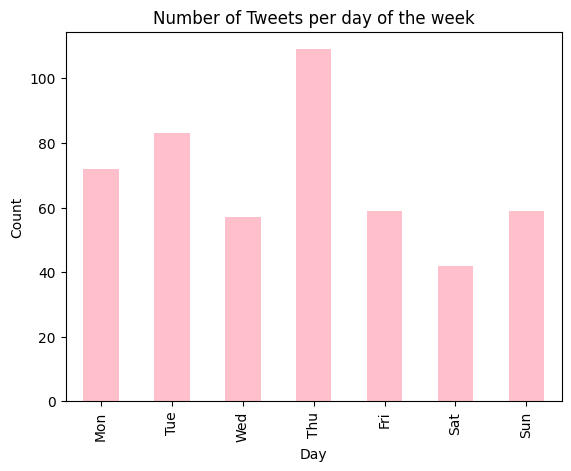

In [222]:
# Using the matplotlib package, create a graph showing the number of tweets per day of the week.

# I will use the series tweets_by_day from the task in pt. 2 as a source of values. However, first I will rearrange the days of the week in the correct order.
custom_order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
tweets_by_day_reordered = tweets_by_day[custom_order]
tweets_by_day_reordered.plot(kind = "bar", color = "pink")

# Embellishing:
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Number of Tweets per day of the week")

# The ready chart:
plt.show()